In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data() 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


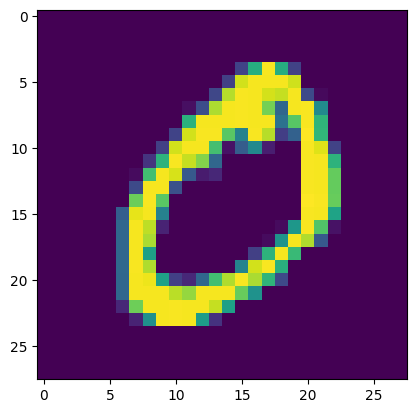

In [10]:
plt.imshow(x_train[1])

In [15]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

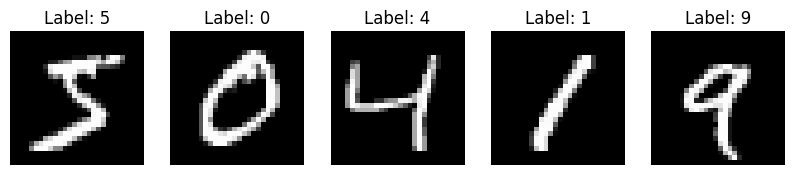

In [20]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5 , i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis("OFF")
    
plt.show()

In [34]:
model = models.Sequential([
    # layer One
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    #layer two
    layers.Conv2D(62, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    
    
])

In [35]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 62)     │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 62)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1550)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       198,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,056 (851.78 KB)

 Trainable params: 218,056 (851.78 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

In [37]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

2025-06-29 11:03:21.283726: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.4627 - loss: 1.5511

2025-06-29 11:06:06.096582: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 168s 213ms/step - accuracy: 0.4630 - loss: 1.5503 - val_accuracy: 0.8887 - val_loss: 0.3686
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 193s 257ms/step - accuracy: 0.8887 - loss: 0.3659 - val_accuracy: 0.9290 - val_loss: 0.2423
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 267ms/step - accuracy: 0.9277 - loss: 0.2376 - val_accuracy: 0.9539 - val_loss: 0.1617
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 198s 264ms/step - accuracy: 0.9501 - loss: 0.1646 - val_accuracy: 0.9625 - val_loss: 0.1336
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 177s 232ms/step - accuracy: 0.9614 - loss: 0.1261 - val_accuracy: 0.9692 - val_loss: 0.1054


In [38]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.8584 - loss: 76.2113


In [40]:
print(f'This is about the accuracy in this data set: {test_accuracy:.4f}')

This is about the accuracy in this data set: 0.8669


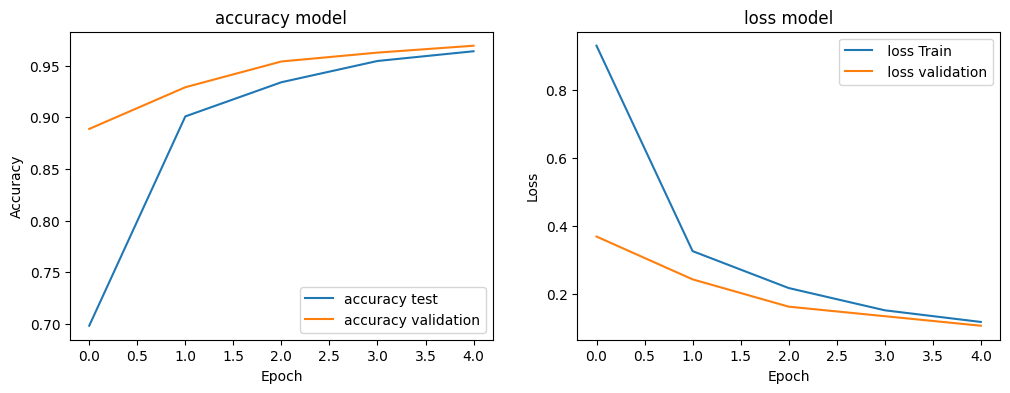

In [41]:
plt.figure(figsize=(12, 4))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy test')
plt.plot(history.history['val_accuracy'], label='accuracy validation')
plt.title('accuracy model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label=' loss Train')
plt.plot(history.history['val_loss'], label=' loss validation')
plt.title('loss model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


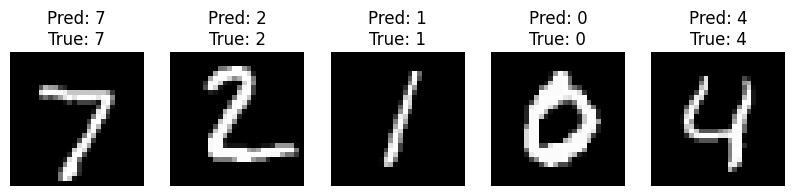

In [42]:
predictions = model.predict(x_test[:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()

# CIFAR-10

In [12]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


NameError: name 'x_train' is not defined